<a href="https://colab.research.google.com/github/ChitrakCDB/MachineLearningAlgorithms/blob/main/FIFA_analysis_With_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

In [ ]:
from google.colab import drive #to import the google drive data

In [ ]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Files" 

/content/drive/My Drive/Colab Notebooks/Files


In [ ]:
df=pd.read_csv('FIFAdata.csv')

**Glimpse of Dataset**

In [ ]:
df.head().T

0  ...                                               4
Unnamed: 0                                                   0  ...                                               4
ID                                                      158023  ...                                          192985
Name                                                  L. Messi  ...                                    K. De Bruyne
Age                                                         31  ...                                              27
Photo           https://cdn.sofifa.org/players/4/19/158023.png  ...  https://cdn.sofifa.org/players/4/19/192985.png
...                                                        ...  ...                                             ...
GKHandling                                                  11  ...                                              13
GKKicking                                                   15  ...                                               5
GKPositioning                                               14  ...                                              10
GKReflexes                                                   8  ...                                              13
Release Clause                                         €226.5M  ...                                         €196.4M

[89 rows x 5 columns]

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
df.describe().T

count           mean  ...       75%       max
Unnamed: 0                18207.0    9103.000000  ...   13654.5   18206.0
ID                        18207.0  214298.338606  ...  236529.5  246620.0
Age                       18207.0      25.122206  ...      28.0      45.0
Overall                   18207.0      66.238699  ...      71.0      94.0
Potential                 18207.0      71.307299  ...      75.0      95.0
Special                   18207.0    1597.809908  ...    1787.0    2346.0
International Reputation  18159.0       1.113222  ...       1.0       5.0
Weak Foot                 18159.0       2.947299  ...       3.0       5.0
Skill Moves               18159.0       2.361308  ...       3.0       5.0
Jersey Number             18147.0      19.546096  ...      26.0      99.0
Crossing                  18159.0      49.734181  ...      64.0      93.0
Finishing                 18159.0      45.550911  ...      62.0      95.0
HeadingAccuracy           18159.0      52.298144  ...      64.0      94.0
ShortPassing              18159.0      58.686712  ...      68.0      93.0
Volleys                   18159.0      42.909026  ...      57.0      90.0
Dribbling                 18159.0      55.371001  ...      68.0      97.0
Curve                     18159.0      47.170824  ...      62.0      94.0
FKAccuracy                18159.0      42.863153  ...      57.0      94.0
LongPassing               18159.0      52.711933  ...      64.0      93.0
BallControl               18159.0      58.369459  ...      69.0      96.0
Acceleration              18159.0      64.614076  ...      75.0      97.0
SprintSpeed               18159.0      64.726967  ...      75.0      96.0
Agility                   18159.0      63.503607  ...      74.0      96.0
Reactions                 18159.0      61.836610  ...      68.0      96.0
Balance                   18159.0      63.966573  ...      74.0      96.0
ShotPower                 18159.0      55.460047  ...      68.0      95.0
Jumping                   18159.0      65.089432  ...      73.0      95.0
Stamina                   18159.0      63.219946  ...      74.0      96.0
Strength                  18159.0      65.311967  ...      74.0      97.0
LongShots                 18159.0      47.109973  ...      62.0      94.0
Aggression                18159.0      55.868991  ...      69.0      95.0
Interceptions             18159.0      46.698276  ...      64.0      92.0
Positioning               18159.0      49.958478  ...      64.0      95.0
Vision                    18159.0      53.400903  ...      64.0      94.0
Penalties                 18159.0      48.548598  ...      60.0      92.0
Composure                 18159.0      58.648274  ...      67.0      96.0
Marking                   18159.0      47.281623  ...      64.0      94.0
StandingTackle            18159.0      47.697836  ...      66.0      93.0
SlidingTackle             18159.0      45.661435  ...      64.0      91.0
GKDiving                  18159.0      16.616223  ...      14.0      90.0
GKHandling                18159.0      16.391596  ...      14.0      92.0
GKKicking                 18159.0      16.232061  ...      14.0      91.0
GKPositioning             18159.0      16.388898  ...      14.0      90.0
GKReflexes                18159.0      16.710887  ...      14.0      94.0

[44 rows x 8 columns]

**Cleaning data**

In [ ]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

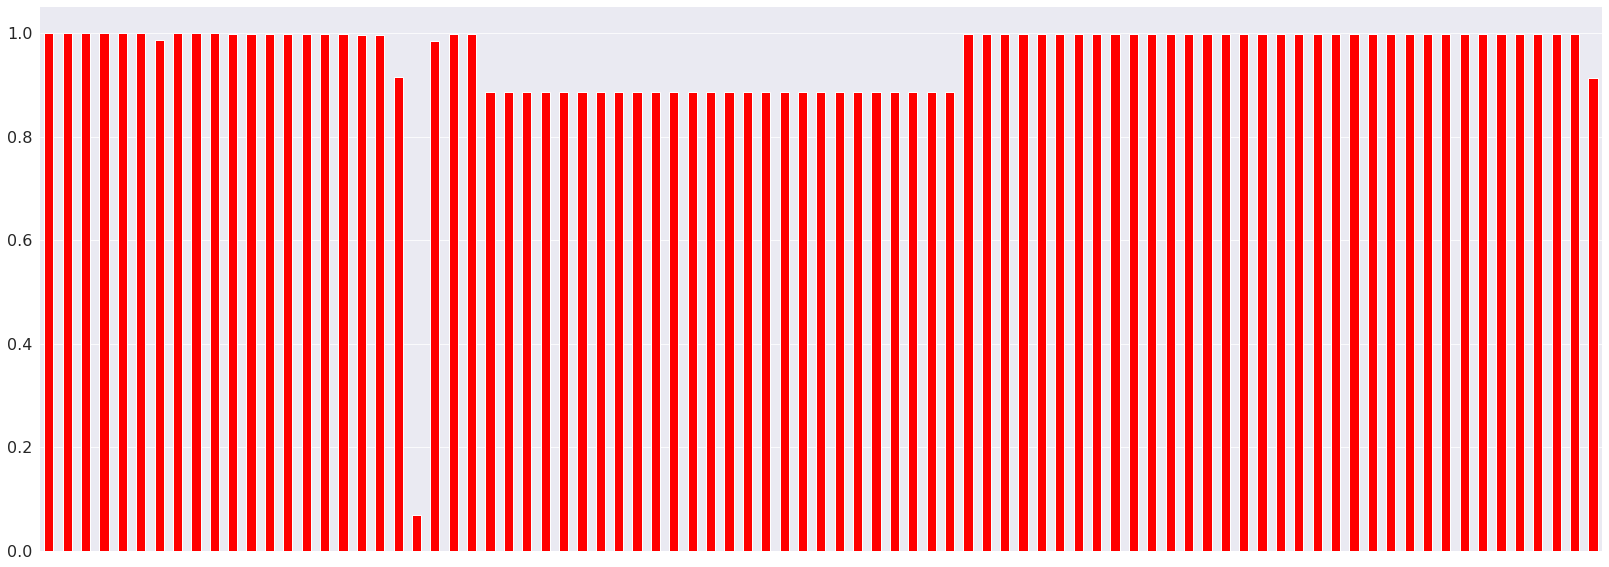

In [ ]:
msno.bar(df.sample( 18207 ),(28,10),color='red')

In [ ]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64

In [ ]:
missing_height = df[df['Height'].isnull()].index.tolist()
missing_weight = df[df['Weight'].isnull()].index.tolist()
if missing_height == missing_weight:
    print('They are same')
else:
    print('They are different')

They are same


In [ ]:
df.drop(df.index[missing_height],inplace =True)

In [ ]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1516
Length: 85, dtype: int64

In [ ]:
df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

**Analysis**

In [ ]:
#Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))
print('--'*40)
print("\nEuropean Countries have most players")

Total number of countries : 164
England      1657
Germany      1195
Spain        1071
Argentina     936
France        911
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------

European Countries have most players


In [ ]:
#Total number of clubs present and top 5 clubs with highest number of players
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

Total number of clubs : 651
Empoli               33
Borussia Dortmund    33
Cardiff City         33
CD Leganés           33
Rayo Vallecano       33
Name: Club, dtype: int64


In [ ]:
#Player with maximum Potential and Overall Performance
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Performance : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Performance : L. Messi


In [ ]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

BEST IN DIFFERENT ASPECTS :
_________________________


Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Bes

In [ ]:
#Cleaning some of values so that we can interpret them 
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [ ]:
df.head().T

0                  1          2       3             4
ID                158023              20801     190871  193080        192985
Name            L. Messi  Cristiano Ronaldo  Neymar Jr  De Gea  K. De Bruyne
Age                   31                 33         26      27            27
Nationality    Argentina           Portugal     Brazil   Spain       Belgium
Overall               94                 94         92      91            91
...                  ...                ...        ...     ...           ...
GKDiving               6                  7          9      90            15
GKHandling            11                 11          9      85            13
GKKicking             15                 15         15      87             5
GKPositioning         14                 14         15      88            10
GKReflexes             8                 11         11      94            13

[82 rows x 5 columns]

In [ ]:
#Top earners
print('Most valued player : '+str(df.loc[df['Value'].idxmax()][1]))
print('Highest earner : '+str(df.loc[df['Wage'].idxmax()][1]))
print("--"*40)
print("\nTop Earners")

Most valued player : Neymar Jr
Highest earner : L. Messi
--------------------------------------------------------------------------------

Top Earners


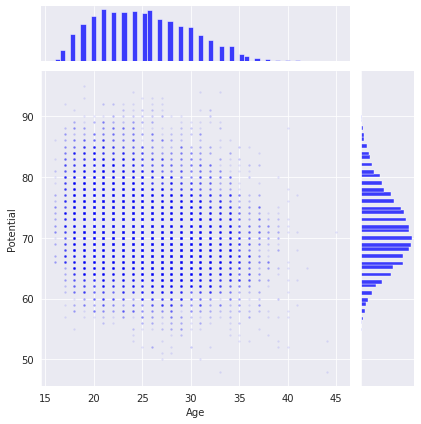

In [ ]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'blue'},
              marginal_kws={'color':'blue'})

Potential gets low with the age

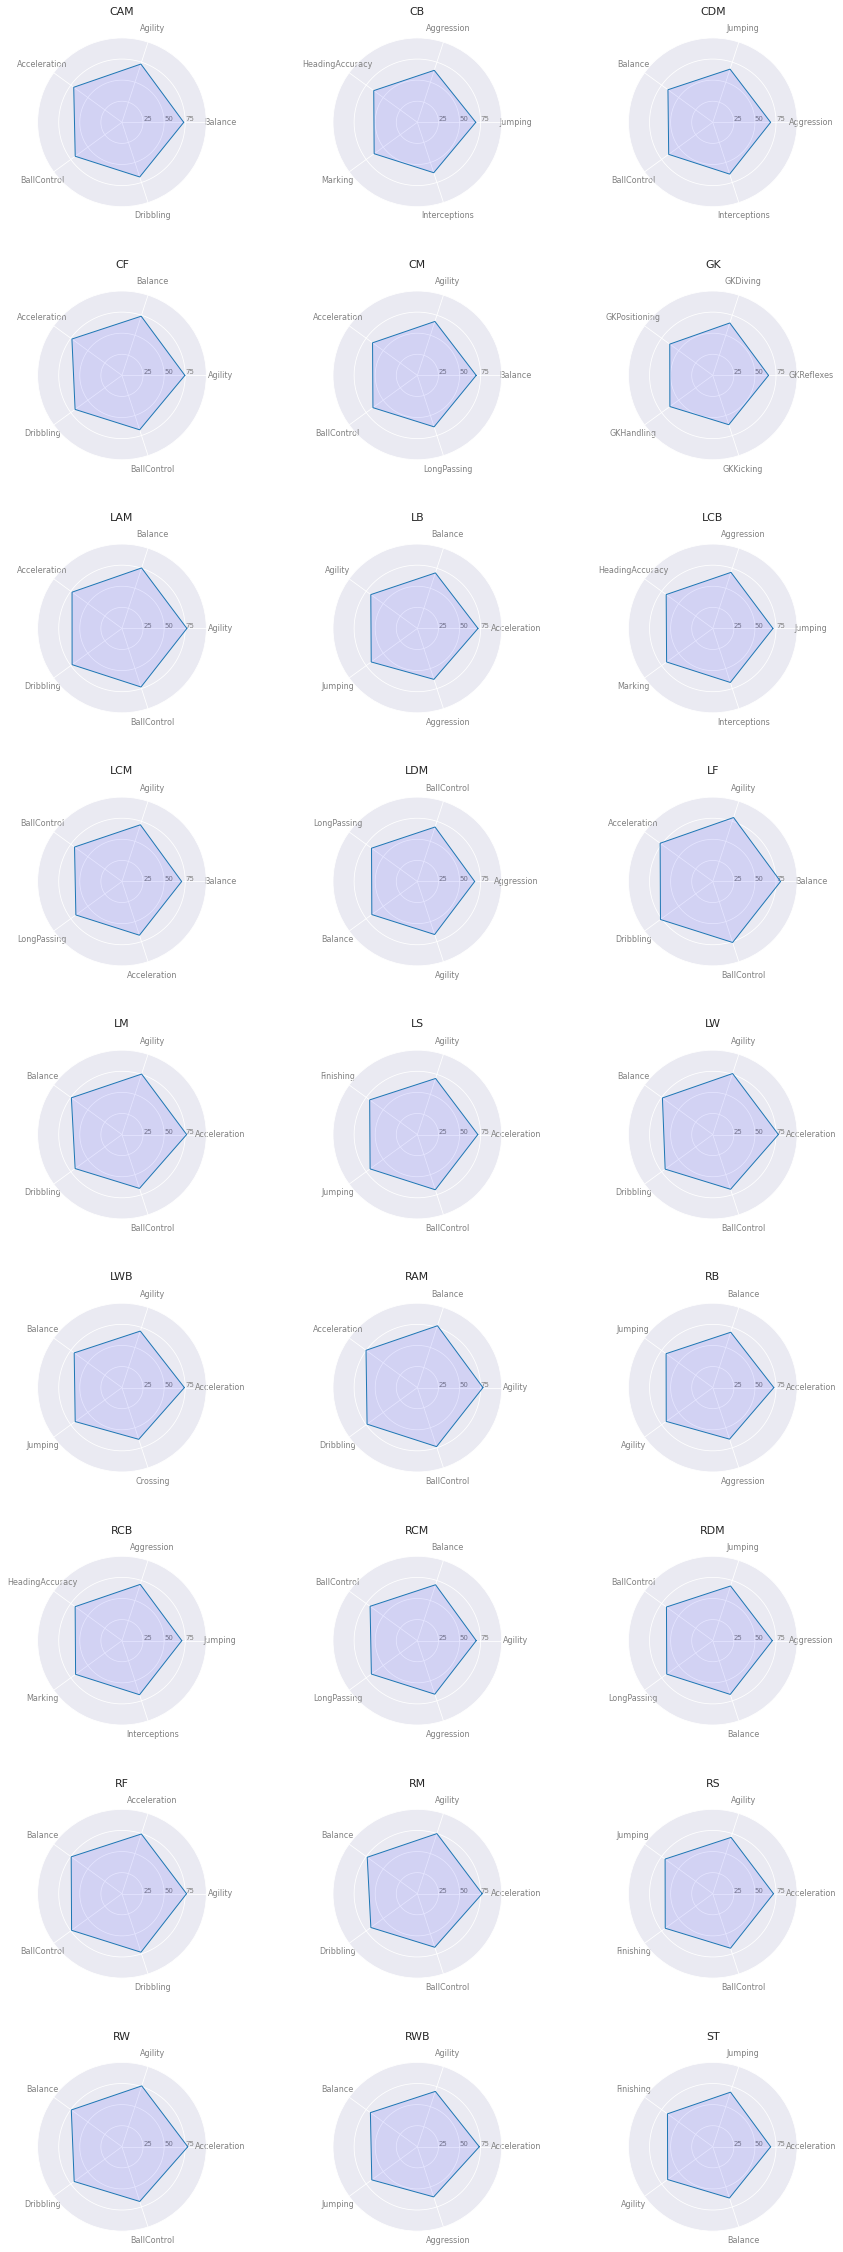

In [ ]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

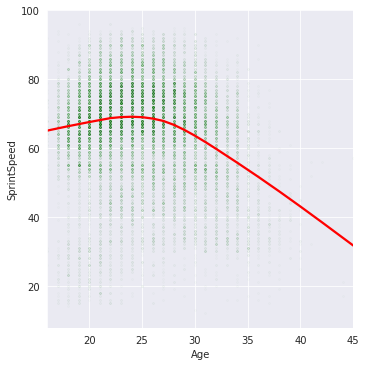

In [ ]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

Sprint decreases while growing

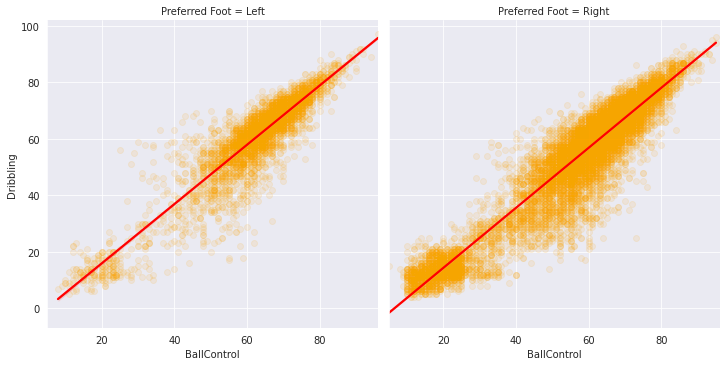

In [ ]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

LEFT FOOT VS RIGHT FOOT PLAYERS

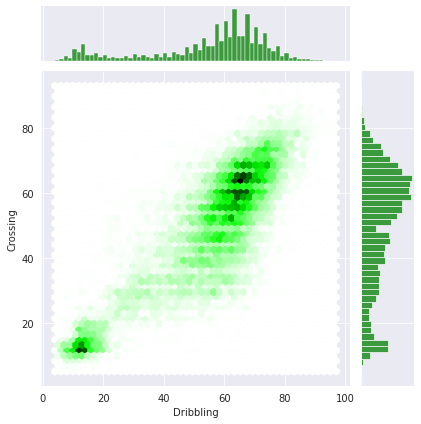

In [ ]:
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="green");

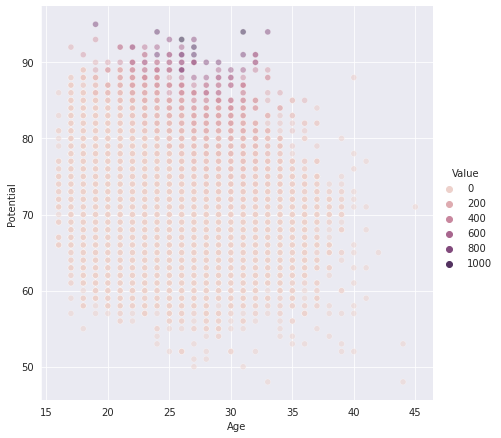

In [ ]:
value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data=df);

Relation between potential and age with respected value of players

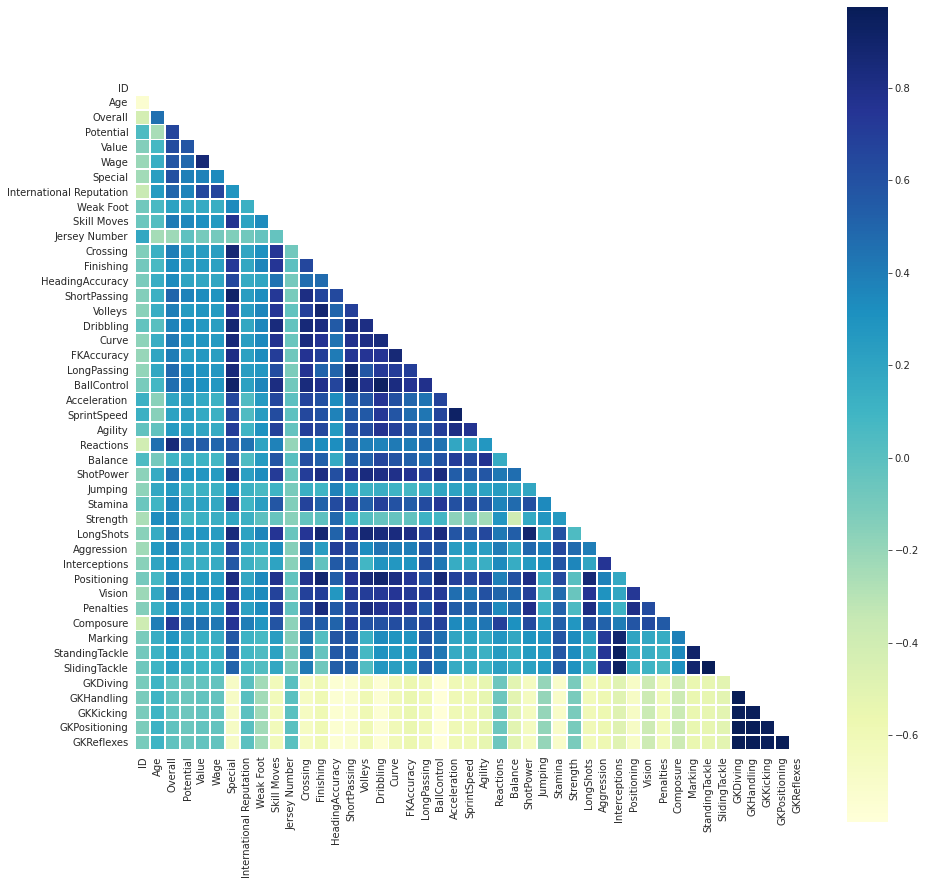

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

Lowest correlation among the goalkeeping side with other columns and high among themselves

High correlation between Dribbling, Volleys, Passing etc...

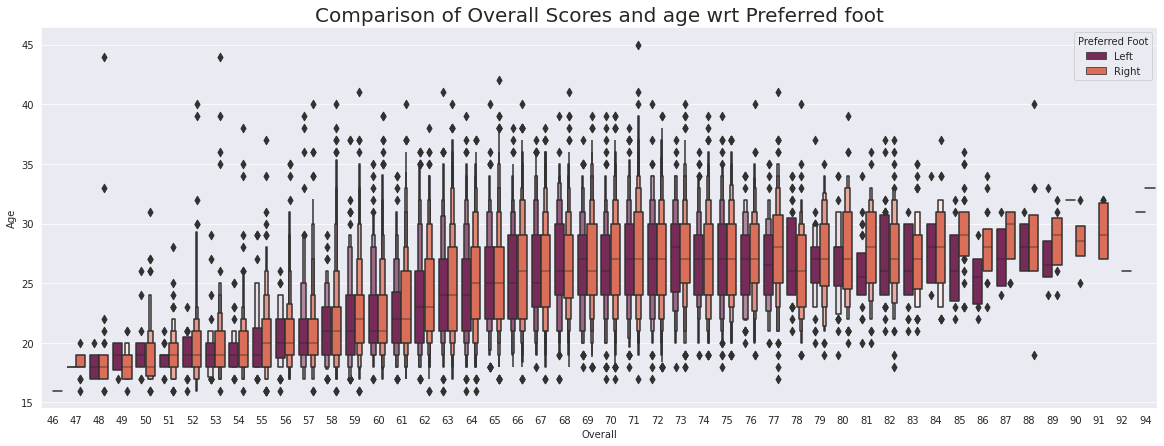

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Overall'], df['Age'], hue = df['Preferred Foot'], palette = 'rocket')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

We will have comparisions for Age, Overall, Potential, Accelaration, SprintSpeed, Agility , Stamina, Strength

In [ ]:
cols = ['Age','Overall','Potential','Acceleration','SprintSpeed',"Agility","Stamina",'Strength','Preferred Foot']
df_small = df[cols]

In [ ]:
df_small.head()

Age  Overall  Potential  ...  Stamina  Strength  Preferred Foot
0   31       94         94  ...     72.0      59.0            Left
1   33       94         94  ...     88.0      79.0           Right
2   26       92         93  ...     81.0      49.0           Right
3   27       91         93  ...     43.0      64.0           Right
4   27       91         92  ...     90.0      75.0           Right

[5 rows x 9 columns]

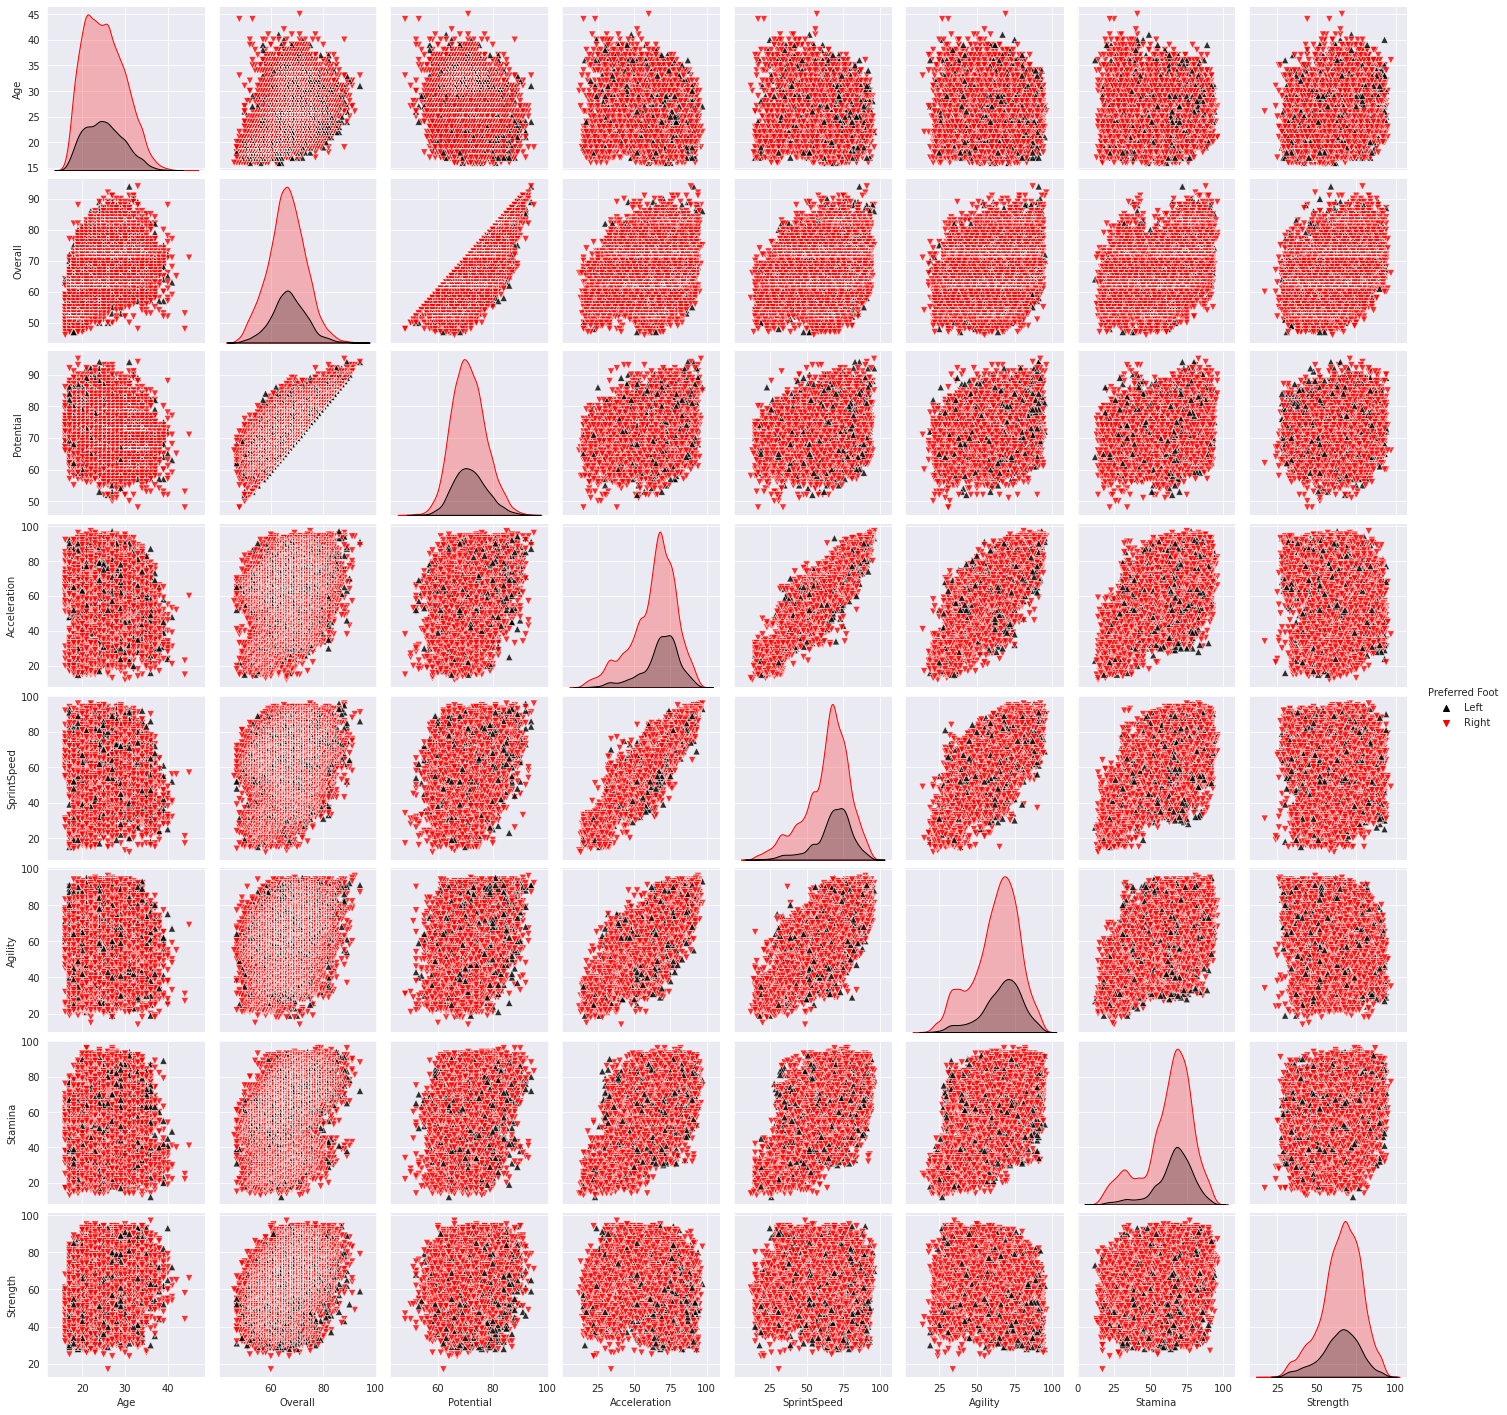

In [ ]:
sns.pairplot(df_small, hue ='Preferred Foot',palette=["black", "red"],plot_kws=dict(s=50, alpha =0.8),markers=['^','v'])

From the plot we can infer many things.
Firstly, most of the people are right footed xD
Some unusual behavior in Potential vs Overall
Accelaration and SprintSpeed follow a proper linear relationship
Agility vs SprintSpeed, Agility vs Accelaration and Agility vs Stamina have somewhat linear relationship

**Modelling**

In [ ]:
df=pd.read_csv('FIFAdata.csv')

In [ ]:
#DROP UNNECESSARY VALUES
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

Age Nationality  Overall  ...  GKKicking GKPositioning  GKReflexes
0   31   Argentina       94  ...       15.0          14.0         8.0
1   33    Portugal       94  ...       15.0          14.0        11.0
2   26      Brazil       92  ...       15.0          15.0        11.0
3   27       Spain       91  ...       87.0          88.0        94.0
4   27     Belgium       91  ...        5.0          10.0        13.0

[5 rows x 45 columns]

In [ ]:
#Turn Real Face into a binary indicator variable
def face_to_num(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
#Turn Preferred Foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

#Create a copy of the original dataframe to avoid indexing errors
df1 = df.copy()

#Apply changes to dataset to create new column
df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

#Split the Work Rate Column in two
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
df1["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
df1["WorkRate2"]= tempwork[1]
#Drop original columns used
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()

Age  Overall  Potential  ...  Major_Nation  WorkRate1  WorkRate2
0   31       94         94  ...             1     Medium     Medium
1   33       94         94  ...             1       High        Low
2   26       92         93  ...             1       High     Medium
3   27       91         93  ...             1     Medium     Medium
4   27       91         92  ...             1       High       High

[5 rows x 46 columns]

In [ ]:
#Split ID as a Target value
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [ ]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9308089125112862
RMSE : 1.8133459440246462


Permutation importance is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

ModuleNotFoundError: ignored

In [ ]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are Potential, Age & Reactions 

NameError: ignored

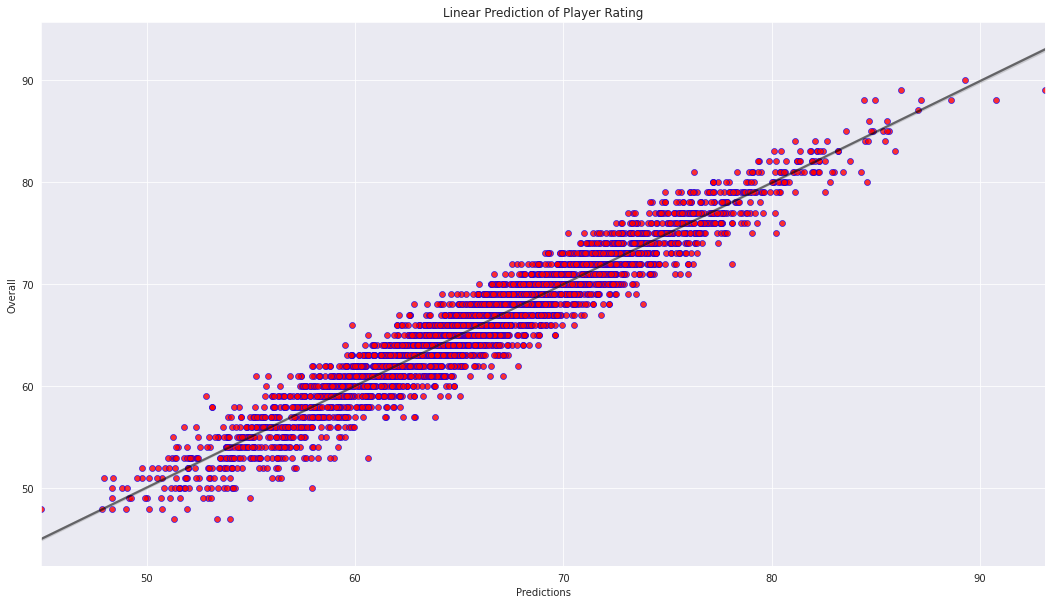

In [ ]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()